In [133]:
library(ggplot2)
library(plyr)
library(scales)
library(dplyr)
library(stringr)


subject,year,count,percentage,sum
copper,2006,32,79,5255
silver,2006,4176,79,5255


In [209]:
load("../data/links_with_xref_data_2.Rda")
get_summ_by_type<-function(data){
    data_type <- data %>% 
        group_by(subject) %>%  
            summarise(total = n())  %>%
        arrange(desc(total)) 
    return(data_type)
}
summ_data<-get_summ_by_type(xref_data)
head(xref_data)
nrow(xref_data)

xref_doi,publisher,type,subject,dc_doi,occurred_at,dc_dc
10.1111/pala.12283,Wiley-Blackwell,journal-article,Palaeontology,10.5061/dryad.dk385,2017-02-13,Dryad
10.12688/f1000research.10763.1,"F1000 Research, Ltd.",journal-article,,10.5256/f1000research.10763.d151064,2017-02-10,Faculty of 1000 Research Ltd
10.12688/f1000research.10426.1,"F1000 Research, Ltd.",journal-article,,10.5281/zenodo.193080,2016-12-20,ZENODO - Research. Shared.
10.1080/15504263.2016.1277816,Informa UK Limited,journal-article,Psychiatry and Mental health,10.3886/ICPSR24461.v4,2017-01-03,ICPSR
10.1080/13803395.2015.1125453,Informa UK Limited,journal-article,Clinical Psychology,10.3886/ICPSR04248.v3,2016-01-18,ICPSR
10.12688/f1000research.10632.1,"F1000 Research, Ltd.",journal-article,,10.5256/f1000research.10632.d150960,2017-02-08,Faculty of 1000 Research Ltd


[1] 3566

In [199]:
summ_data$column<-"Subject"
summ_data$sum<-sum(summ_data$total)
summ_data <- summ_data  %>% filter(subject !="")
summ_data$sum<-sum(summ_data$total)
summ_data <- summ_data %>% mutate(percentage = (total/sum)*100) %>%
        filter(percentage >= 1.80334) %>%
        arrange(desc(total)) 
# head(summ_data,15)
summ_data

subject,total,column,sum,percentage
"General Biochemistry, Genetics and Molecular Biology",186,Subject,2329,7.986260
Atmospheric Science,148,Subject,2329,6.354659
General Earth and Planetary Sciences,130,Subject,2329,5.581795
Ecology,124,Subject,2329,5.324173
Physical and Theoretical Chemistry,88,Subject,2329,3.778446
"Ecology, Evolution, Behavior and Systematics",87,Subject,2329,3.735509
Sociology and Political Science,78,Subject,2329,3.349077
Geotechnical Engineering and Engineering Geology,73,Subject,2329,3.134392
Plant Science,71,Subject,2329,3.048519
Applied Psychology,61,Subject,2329,2.619150


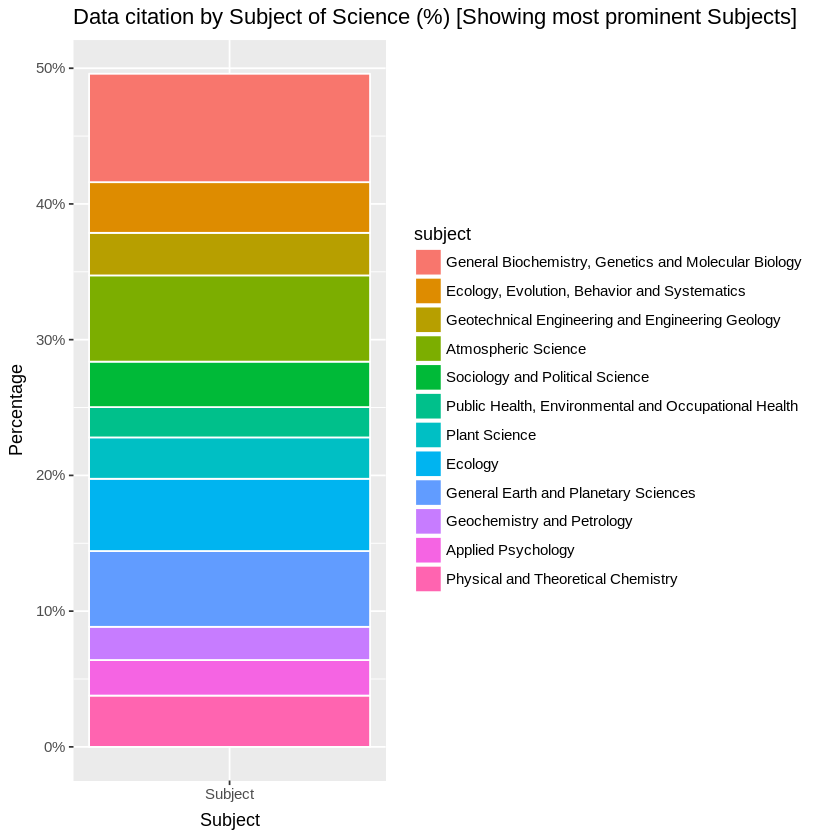

In [200]:

p4 <- ggplot() + geom_bar(aes(y = percentage, x = column, fill = subject), data = head(summ_data,12),
                           stat="identity", colour="white")   + labs(x="Subject", y="Percentage") +
  scale_y_continuous(labels = dollar_format(suffix = "%", prefix = "")) + 
  ggtitle("Data citation by Subject of Science (%) [Showing most prominent Subjects]") 
p4

In [201]:
get_summ_by_type(data_links)

Warning message:
“Grouping rowwise data frame strips rowwise nature”

subject,total
NA,3566


In [202]:
xref_data

xref_doi,publisher,type,subject,dc_doi,occurred_at,dc_dc
10.1111/pala.12283,Wiley-Blackwell,journal-article,Palaeontology,10.5061/dryad.dk385,2017-02-13,Dryad
10.12688/f1000research.10763.1,"F1000 Research, Ltd.",journal-article,,10.5256/f1000research.10763.d151064,2017-02-10,Faculty of 1000 Research Ltd
10.12688/f1000research.10426.1,"F1000 Research, Ltd.",journal-article,,10.5281/zenodo.193080,2016-12-20,ZENODO - Research. Shared.
10.1080/15504263.2016.1277816,Informa UK Limited,journal-article,Psychiatry and Mental health,10.3886/ICPSR24461.v4,2017-01-03,ICPSR
10.1080/13803395.2015.1125453,Informa UK Limited,journal-article,Clinical Psychology,10.3886/ICPSR04248.v3,2016-01-18,ICPSR
10.12688/f1000research.10632.1,"F1000 Research, Ltd.",journal-article,,10.5256/f1000research.10632.d150960,2017-02-08,Faculty of 1000 Research Ltd
10.1080/15504263.2016.1277816,Informa UK Limited,journal-article,Psychiatry and Mental health,10.3886/ICPSR30122.v5,2017-01-03,ICPSR
10.7554/eLife.20975,"eLife Sciences Organisation, Ltd.",journal-article,"General Biochemistry, Genetics and Molecular Biology",10.5061/dryad.bn1gf,2017-02-14,Dryad
10.1111/pala.12281,Wiley-Blackwell,journal-article,Palaeontology,10.5061/dryad.320h5,2017-02-13,Dryad
10.12688/f1000research.9434.1,"F1000 Research, Ltd.",journal-article,,10.5281/zenodo.167143,2016-12-01,ZENODO - Research. Shared.


## Publisher citing over time

In [203]:
get_summ_by_publisher_before<-function(data){
    data_type <- data %>%
        filter(occurred_at <= as.Date("2017-03-01")) %>%
        group_by(publisher) %>%  
            summarise(total = n())  %>%
        arrange(desc(total))
    return(data_type)
}


create_slope_data<-function(data){

    previous<-get_summ_by_publisher_before(data)
    colnames(previous)[2] <- "2017"
    
    last<-get_summ_by_publisher(data)
    colnames(last)[2] <- "2018"

    r <- previous %>% 
        rowwise() %>% 
        left_join(last)
    print(nrow(r))
    return(head(r,8)) 
}

In [204]:
get_summ_by_publisher<-function(data){
    data_type <- data %>% 
        group_by(publisher) %>%  
            summarise(total = n())  %>%
        arrange(desc(total))
    return(data_type)
}


Joining, by = "publisher"


[1] 70


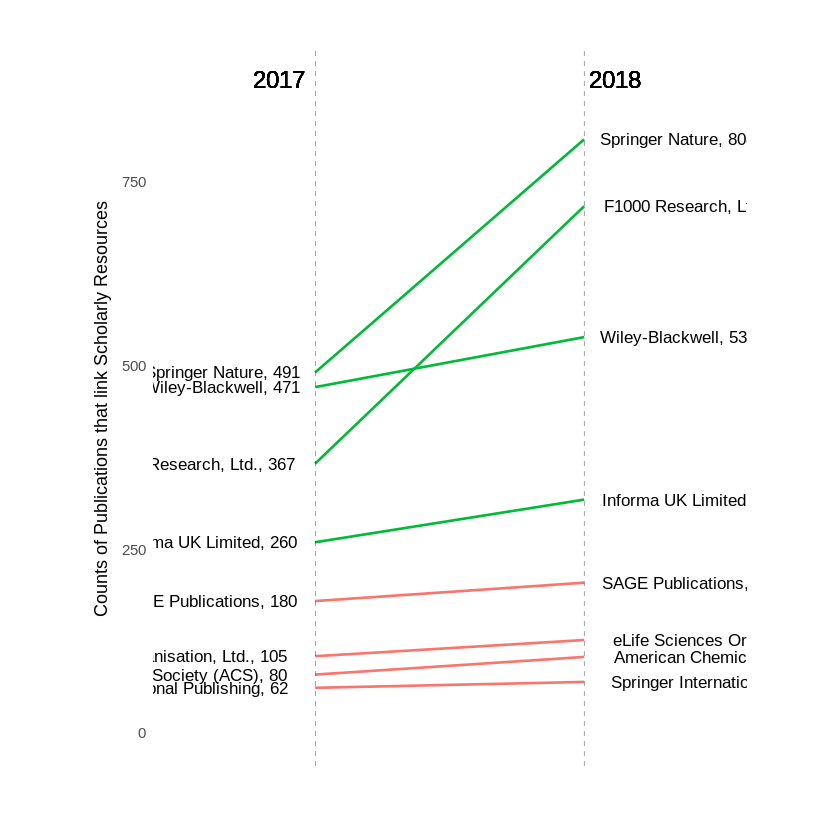

In [205]:
plot_slopegraph<-function(slope_df){
    # Plot
    left_label <- paste(slope_df$publisher, round(slope_df$`2017`),sep=", ")
    right_label <- paste(slope_df$publisher, round(slope_df$`2018`),sep=", ")
    slope_df$class <- ifelse((slope_df$`2018` - slope_df$`2017`) < 50, "red", "green")

    p <- ggplot(slope_df) + geom_segment(aes(x=1, xend=2, y=`2017`, yend=`2018`, col=class), size=.75, show.legend=F) + 
                      geom_vline(xintercept=1, linetype="dashed", size=.1) + 
                      geom_vline(xintercept=2, linetype="dashed", size=.1) +
                      scale_color_manual(labels = c("Up", "Down"), 
                                         values = c("green"="#00ba38", "red"="#f8766d")) +  # color of lines
                      labs(x="", y="Counts of Publications that link Scholarly Resources ") +  # Axis labels
                      xlim(.5, 2.5) + ylim(0,(1.1*(max(slope_df$`2017`, slope_df$`2018`))))  # X and Y axis limits

    # Add texts
    p <- p + geom_text(label=left_label, y=slope_df$`2017`, x=rep(1, NROW(slope_df)), hjust=1.1, size=3.5)
    p <- p + geom_text(label=right_label, y=slope_df$`2018`, x=rep(2, NROW(slope_df)), hjust=-0.1, size=3.5)
    p <- p + geom_text(label="2017", x=1, y=1.1*(max(slope_df$`2017`, slope_df$`2018`)), hjust=1.2, size=5)  # title
    p <- p + geom_text(label="2018", x=2, y=1.1*(max(slope_df$`2017`, slope_df$`2018`)), hjust=-0.1, size=5)  # title

    # Minify theme
    p + theme(panel.background = element_blank(), 
               panel.grid = element_blank(),
               axis.ticks = element_blank(),
               axis.text.x = element_blank(),
               panel.border = element_blank(),
               plot.margin = unit(c(1,2,1,2), "cm"))
}

plot_slopegraph(create_slope_data(xref_data))

In [206]:
load("../data/datalinks_type.Rda")
xref_data<-data_pack_w_type
nrow(xref_data)
head(xref_data)
colnames(xref_data)[colnames(xref_data)=="subj_dc"] <- "publisher"
summ_data<-get_summ_by_publisher(xref_data)

rr<- xref_data %>%
    filter(publisher == "Elsevier BV") %>%  
    group_by(type) %>%  
            summarise(total = n())  

head(rr)


[1] 22000

license,obj_id,source_token,occurred_at,subj_id,id,terms,message_action,source_id,timestamp,relation_type_id,obj_prefix,subj_prefix,unique(data$subj_prefix),subj_dc,unique(data$obj_prefix),obj_dc,doi,type
https://doi.org/10.13003/CED-terms-of-use,10.13140/RG.2.1.1350.3122,8676e950-8ac5-4074-8ac3-c0a18ada7e99,2017-04-01,https://doi.org/10.1109/LRA.2017.2651945,26eb9df3-c841-48c2-b3f8-239c0bf91506,https://doi.org/10.13003/CED-terms-of-use,create,crossref,2017-05-19,references,10.13140/,10.1109/,10.1109/,Institute of Electrical and Electronics Engineers (IEEE),10.13140/,ResearchGate,10.13140/RG.2.1.1350.3122,
https://doi.org/10.13003/CED-terms-of-use,10.5061/dryad.dk385,8676e950-8ac5-4074-8ac3-c0a18ada7e99,2017-02-13,https://doi.org/10.1111/pala.12283,d53dd280-221e-48f9-bbf8-d48aba12d818,https://doi.org/10.13003/CED-terms-of-use,create,crossref,2017-05-19,references,10.5061/,10.1111/,10.1111/,Wiley-Blackwell,10.5061/,Dryad,10.5061/dryad.dk385,dataset
https://doi.org/10.13003/CED-terms-of-use,10.7930/J0H12ZXG,8676e950-8ac5-4074-8ac3-c0a18ada7e99,2017-02-13,https://doi.org/10.1007/s10669-017-9631-z,a750e5b8-3bc6-4054-a321-949c7ad330c5,https://doi.org/10.13003/CED-terms-of-use,create,crossref,2017-05-19,references,10.7930/,10.1007/,10.1007/,Springer Nature,10.7930/,U.S. Global Change Research Program/UCAR,10.7930/J0H12ZXG,text
https://doi.org/10.13003/CED-terms-of-use,10.5195/errs.2012.125,8676e950-8ac5-4074-8ac3-c0a18ada7e99,2016-11-21,https://doi.org/10.1080/14702436.2016.1256209,f007f43b-7649-4b43-9224-3729b2536f65,https://doi.org/10.13003/CED-terms-of-use,create,crossref,2017-05-19,references,10.5195/,10.1080/,10.1080/,Informa UK Limited,10.5195/,University of Pittsburgh,10.5195/errs.2012.125,text
https://doi.org/10.13003/CED-terms-of-use,10.5256/f1000research.10763.d151064,8676e950-8ac5-4074-8ac3-c0a18ada7e99,2017-02-10,https://doi.org/10.12688/f1000research.10763.1,46f3df4f-74c0-42f2-a76d-b108f86d768b,https://doi.org/10.13003/CED-terms-of-use,create,crossref,2017-05-19,references,10.5256/,10.12688/,10.12688/,"F1000 Research, Ltd.",10.5256/,Faculty of 1000 Research Ltd,10.5256/f1000research.10763.d151064,dataset
https://doi.org/10.13003/CED-terms-of-use,10.5281/zenodo.193080,8676e950-8ac5-4074-8ac3-c0a18ada7e99,2016-12-20,https://doi.org/10.12688/f1000research.10426.1,d871bfce-69ce-4437-be74-b8584ef3b0ec,https://doi.org/10.13003/CED-terms-of-use,create,crossref,2017-05-19,references,10.5281/,10.12688/,10.12688/,"F1000 Research, Ltd.",10.5281/,ZENODO - Research. Shared.,10.5281/zenodo.193080,dataset


Warning message:
“Grouping rowwise data frame strips rowwise nature”Warning message:
“Grouping rowwise data frame strips rowwise nature”

type,total
,7
collection,7
dataset,46
text,1382


In [207]:
get_summ_by_datacentre<-function(data){
    data_type <- data %>% 
        group_by(dc_dc) %>%  
            summarise(total = n())  %>%
        arrange(desc(total))
    return(data_type)
}
head(get_summ_by_datacentre(xref_data))

Warning message:
“Grouping rowwise data frame strips rowwise nature”

ERROR: Error in grouped_df_impl(data, unname(vars), drop): Column `dc_dc` is unknown


In [208]:
get_summ_by_dc_dc_before<-function(data){
    data_type <- data %>%
        filter(occurred_at <= as.Date("2017-03-01")) %>%
        group_by(dc_dc) %>%  
            summarise(total = n())  %>%
        arrange(desc(total))
    return(data_type)
}


create_slope_data<-function(data){

    previous<-get_summ_by_dc_dc_before(data)
    colnames(previous)[2] <- "2017"
    
    last<-get_summ_by_dc_dc(data)
    colnames(last)[2] <- "2018"

    r <- previous %>% 
        rowwise() %>% 
        left_join(last)
    print(nrow(r))
    return(head(r,8)) 
}

get_summ_by_dc_dc<-function(data){
    data_type <- data %>% 
        group_by(dc_dc) %>%  
            summarise(total = n())  %>%
        arrange(desc(total))
    return(data_type)
}

plot_slopegraph<-function(slope_df){
    # Plot
    left_label <- paste(slope_df$dc_dc, round(slope_df$`2017`),sep=", ")
    right_label <- paste(slope_df$dc_dc, round(slope_df$`2018`),sep=", ")
    slope_df$class <- ifelse((slope_df$`2018` - slope_df$`2017`) < 50, "red", "green")

    p <- ggplot(slope_df) + geom_segment(aes(x=1, xend=2, y=`2017`, yend=`2018`, col=class), size=.75, show.legend=F) + 
                      geom_vline(xintercept=1, linetype="dashed", size=.1) + 
                      geom_vline(xintercept=2, linetype="dashed", size=.1) +
                      scale_color_manual(labels = c("Up", "Down"), 
                                         values = c("green"="#00ba38", "red"="#f8766d")) +  # color of lines
                      labs(x="", y="Counts of Publications that link Scholarly Resources ") +  # Axis labels
                      xlim(.5, 2.5) + ylim(0,(1.1*(max(slope_df$`2017`, slope_df$`2018`))))  # X and Y axis limits

    # Add texts
    p <- p + geom_text(label=left_label, y=slope_df$`2017`, x=rep(1, NROW(slope_df)), hjust=1.1, size=3.5)
    p <- p + geom_text(label=right_label, y=slope_df$`2018`, x=rep(2, NROW(slope_df)), hjust=-0.1, size=3.5)
    p <- p + geom_text(label="2017", x=1, y=1.1*(max(slope_df$`2017`, slope_df$`2018`)), hjust=1.2, size=5)  # title
    p <- p + geom_text(label="2018", x=2, y=1.1*(max(slope_df$`2017`, slope_df$`2018`)), hjust=-0.1, size=5)  # title

    # Minify theme
    p + theme(panel.background = element_blank(), 
               panel.grid = element_blank(),
               axis.ticks = element_blank(),
               axis.text.x = element_blank(),
               panel.border = element_blank(),
               plot.margin = unit(c(1,2,1,2), "cm"))
}

plot_slopegraph(create_slope_data(xref_data))

Warning message:
“Grouping rowwise data frame strips rowwise nature”

ERROR: Error in grouped_df_impl(data, unname(vars), drop): Column `dc_dc` is unknown
